## Imports and loading model

In [16]:
import sys
sys.path.append('../lib/')
from text_processors import text_process_policy
import pandas as pd
import numpy as np
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix
#from sklearn.externals import joblib
import pickle

In [17]:
with open('../pickles/data_encryption_RF_policy.pkl', 'rb') as file:
    model = pickle.load(file)

## Make some predictions based on new text

In [18]:
fb = ["""
Workplace Privacy Policy
Effective Date: September 30, 2016

Workplace allows users to more effectively collaborate and share information at work. This Privacy Policy describes how and when your information is collected, used, and shared by Facebook when you, your colleagues, or other users use the Workplace platform (which includes the Workplace websites, apps and related online services that link to this Privacy Policy, which we call the “Services”).

The Services are intended for use by organizations and in accordance with their instructions. If you are using the Services in a workplace or on a device or account issued to you by your employer or another organization (your “Organization”), that Organization likely has its own policies regarding storage, access, modification, deletion, and retention of information you submit or provide through the Services.

This means that your Organization has the right to (i) control and administer your Workplace account (“Your Account”) and (ii) access and process any data you submit or provide through the Services, including, for example, your files and communications. Please contact your Organization with any privacy inquiries regarding policies, including any enterprise agreements with Facebook, it has in place regarding your use of the Services.

As a reminder, Workplace is a different service from other Facebook services you may use. Those other Facebook services are governed by their own terms, whereas this Privacy Policy and the Workplace Acceptable Use Policy applies to your use of the Services.

I. COLLECTION OF INFORMATION
Facebook may collect the following kinds of information on behalf of your Organization when you, your colleagues, or other users access the Services:

Customer Data. Through use of the Services, you, your colleagues, your Organization, and other users, will directly provide or submit information to Facebook ("Customer Data"). Customer Data includes, for example:
Contact information, such as full name and email address;
Demographic information;
Username and password;
Work title, department information, and other information related to your work or Organization;
All content that you create, share or post in audio, video, text, images, and other media or software files that you provide on or through the Services, or that are provided on your behalf, including information in or about the content you provide, such as the location of a photo or the date a file was created;
Information other people provide about you when using the Services, including when they send a message to you or upload information about you;
All communications with other users of the Services;
User communications, feedback, suggestions, and ideas sent to us;
Billing information; and
Information you provide us when you or your Organization contact or engage us for support regarding the Services.

Log and Cookie Data. We automatically collect certain information on your Organization’s behalf through the Services, such as your Internet protocol (IP) address and other browser or device identifiers, browser type, operating system, crash data, Internet service provider, pages that you visit before and after using the Services, the date and time of your visit, information about your activities (such as the links you click and pages you view) within the Services, and other standard server-log information (“Log and Cookie Data”).

In order to provide the Services on behalf of your Organization, we may use cookies, pixel tags, local storage objects, and similar technologies to automatically collect this information. You can find out more about our use of cookies and related technologies, including the purposes for which we use them, by reading our Workplace Cookies Statement. By using the Services, you consent to our use of cookies and similar technologies as described in our Workplace Cookies Statement.

Your browser or device may offer settings related to these technologies. For more information about whether these settings are available, what they do, and how they work, visit your browser or device's help material. We may not recognize or respond to browser or device signals around tracking, and some settings may interfere with your use of features we offer. Additionally, the settings offered by a browser or device often apply only to that particular browser or device.

Information we collect from Facebook and Our Family of Companies. From time to time, we may receive information on your Organization’s behalf, about you from companies that are owned or operated by Facebook, in accordance with their terms and policies. Learn more about these companies and their privacy policies.

We also receive information from our third party partners on your Organization’s behalf for some of the purposes described in Section II below.

II. USE OF INFORMATION
Facebook will use information we collect to provide, develop, and improve the Services on your Organization’s behalf and in accordance with any other instructions from your Organization. Examples of such use include:
Communicate with users and administrators regarding their use of the Services;
Enhance the security and safety of the Services for your Organization and other users;
Personalize your and your Organization’s experiences as part of our provision of the Services;
Develop new tools, products, or services for your Organization;
Associate activity on our Services across different devices operated by the same individual to improve the Service which we provide to your Organization;
Associate activity on our Services across different devices operated by the same individual; and
Conduct data and system analytics, including research to improve the Services. In these circumstances Facebook shall to the extent possible use de-identified or aggregated data.

We may also use the information we collect in order to operate, maintain, and improve the systems and infrastructure that provide the Services. You and your Organization authorize us to do so and acknowledge that this may also result in improvements to the Facebook Services, since centralized systems and infrastructure support the Services and Facebook Services. For example, we may use crash logs from your use of the Services to identify and fix bugs that may also be present in the Facebook Services.

III. DISCLOSURE OF INFORMATION
We may, as directed or approved by your Organization, disclose the information that we collect in the following circumstances:
To your Organization, network administrators, and other users authorized by your Organization to access the requested information;
To third-party service providers that are in the United States and in other countries where such service providers assist in providing the Services or part of the Services;
To the family of companies that are part of Facebook;
To third-party apps, websites, or other services that you can connect to through the Services;
In connection with a substantial corporate transaction, such as the sale of our Services, a merger, consolidation, asset sale, or in the unlikely event of bankruptcy or insolvency;
To protect the safety of any person; to address fraud, security or technical issues; or to protect Workplace’s rights or property; and
As otherwise directed or authorized by your Organization.

Legal Requests. If we receive a subpoena, warrant, discovery order or other request or order from a law enforcement agency, court, other governmental entity, or litigant that seeks data relating to the Services (collectively a “Legal Request”), we will make reasonable attempts to direct the requesting party to seek the data directly from your Organization. If we ask the requesting party to direct the request to the Organization, we will provide your Organization’s contact information to the requesting party. If legally compelled to produce information and unless legally prohibited, we will use reasonable efforts to notify your Organization so they can notify you pursuant to your Organization’s policies and as permitted by law. We will direct any requests for information under data protection laws to your Organization, unless prohibited by law.

Aggregate or de-identified data. We may also disclose information that has been aggregated or that otherwise does not personally identify you to third parties and affiliates who may use it for analytics, trends and analysis to improve and provide our products and services and the products and services provided by the Facebook Family of Companies described here.

V. ACCESSING AND MODIFYING YOUR INFORMATION
You and your Organization may access, correct, or delete information you have uploaded to the Services by using the tools within the Services (for example, editing your profile information or via Activity Log) provided by us on behalf of your Organization. If not enabled by the tools provided on the Services, you should contact your Organization directly to access or modify your information.

Changes you make to your information on the Services take immediate effect on your specific network, but data will be retained by Facebook in backup copies for a commercially reasonable amount of time and as directed by your Organization.

VI. DATA LOCATION AND PRIVACY SHIELD
In providing the Services to you and in using the service providers referred to in this Privacy Policy, you understand that information may be stored or processed in different locations around the world by us on your Organization’s behalf. For example, information collected within the European Economic Area (“EEA”) may, for example, be transferred to countries outside of the EEA for the purposes described in this policy.

For users outside the US and Canada, you acknowledge that using the Services may result in Facebook, Inc. receiving personal information from you (it will do so solely acting on behalf of Facebook Ireland Limited (Facebook Ireland)) in respect of which it has made commitments under the EU-US Privacy Shield (“Privacy Shield”). Facebook Inc. complies with the Privacy Shield Principles regarding any personal information received in reliance on Privacy Shield, as described in our Privacy Shield certification. Further information on Facebook Inc.’s participation in Privacy Shield, including contact information, is set out below and also available here.

VII. THIRD-PARTY LINKS AND CONTENT
Some of the Services may contain links to content maintained by third parties that we do not control. We are not responsible for the privacy practices of these third parties, and we recommend that you visit the privacy policies of each website that you visit.

VIII. ACCOUNT CLOSURE
If you would like to stop using the Services, you should contact your Organization. Similarly, if you stop working for or with the Organization, the Organization may suspend Your Account and/or delete any information associated with Your Account.

It typically takes about 90 days to delete an account on behalf of your Organization after account closure, but some information may remain in backup copies for a reasonable period of time as directed by your Organization. Please note, content you create and share on the Services is owned by your Organization and may remain on the Services and be accessible even if your Organization deactivates or terminates Your Account. In this way, content you provide on the Services is similar to other types of content (such as presentations or memos) that you may generate in the course of your work.

IX. CHANGES TO THE PRIVACY POLICY
We may update this Privacy Policy from time to time. When we update the Privacy Policy, we will revise the “Effective Date” date above and post the new Privacy Policy.

X. CONTACT US
If you have any questions about this Privacy Policy or our practices, please first contact us via your Organization’s account manager because, as stated above, your use of our Services is likely subject to your Organization’s own policies.
If you have further questions about this Privacy Policy, or wish to learn more about our privacy practices, including transfers under the Privacy Shield, please contact your Organization or us by email at privacyshield@support.facebook.com, or by mail at:
Facebook, Inc.
1601 Willow Road
Menlo Park, CA 94025 (if you live in the US or Canada)
OR
Facebook Ireland Ltd.
4 Grand Canal Square
Grand Canal Harbour
Dublin 2 Ireland (if you live anywhere else).
"""]

In [21]:
result_fb = model.predict(fb)
result_fb = 'DOES' if result_fb == 1 else 'DOESN''T'
result_fb

'DOES'

In [5]:
google = ["""
Privacy Policy

Hide examples
Last modified: April 17, 2017 (view archived versions)
Download PDF version
There are many different ways you can use our services – to search for and share information, to communicate with other people or to create new content. When you share information with us, for example by creating a Google Account, we can make those services even better – to show you more relevant search results and ads, to help you connect with people or to make sharing with others quicker and easier. As you use our services, we want you to be clear how we’re using information and the ways in which you can protect your privacy.

Our Privacy Policy explains:

What information we collect and why we collect it.
How we use that information.
The choices we offer, including how to access and update information.
We’ve tried to keep it as simple as possible, but if you’re not familiar with terms like cookies, IP addresses, pixel tags and browsers, then read about these key terms first. Your privacy matters to Google so whether you are new to Google or a long-time user, please do take the time to get to know our practices – and if you have any questions contact us.

Back to top
Information we collect

We collect information to provide better services to all of our users – from figuring out basic stuff like which language you speak, to more complex things like which ads you’ll find most useful, the people who matter most to you online, or which YouTube videos you might like.

We collect information in the following ways:

Information you give us. For example, many of our services require you to sign up for a Google Account. When you do, we’ll ask for personal information, like your name, email address, telephone number or credit card to store with your account. If you want to take full advantage of the sharing features we offer, we might also ask you to create a publicly visible Google Profile, which may include your name and photo.

Information we get from your use of our services. We collect information about the services that you use and how you use them, like when you watch a video on YouTube, visit a website that uses our advertising services, or view and interact with our ads and content. This information includes:

Device information

We collect device-specific information (such as your hardware model, operating system version, unique device identifiers, and mobile network information including phone number). Google may associate your device identifiers or phone number with your Google Account.

Log information

When you use our services or view content provided by Google, we automatically collect and store certain information in server logs. This includes:

details of how you used our service, such as your search queries.
telephony log information like your phone number, calling-party number, forwarding numbers, time and date of calls, duration of calls, SMS routing information and types of calls.
Internet protocol address.
device event information such as crashes, system activity, hardware settings, browser type, browser language, the date and time of your request and referral URL.
cookies that may uniquely identify your browser or your Google Account.
Location information

When you use Google services, we may collect and process information about your actual location. We use various technologies to determine location, including IP address, GPS, and other sensors that may, for example, provide Google with information on nearby devices, Wi-Fi access points and cell towers.

Unique application numbers

Certain services include a unique application number. This number and information about your installation (for example, the operating system type and application version number) may be sent to Google when you install or uninstall that service or when that service periodically contacts our servers, such as for automatic updates.

Local storage

We may collect and store information (including personal information) locally on your device using mechanisms such as browser web storage (including HTML 5) and application data caches.

Cookies and similar technologies

We and our partners use various technologies to collect and store information when you visit a Google service, and this may include using cookies or similar technologies to identify your browser or device. We also use these technologies to collect and store information when you interact with services we offer to our partners, such as advertising services or Google features that may appear on other sites. Our Google Analytics product helps businesses and site owners analyze the traffic to their websites and apps. When used in conjunction with our advertising services, such as those using the DoubleClick cookie, Google Analytics information is linked, by the Google Analytics customer or by Google, using Google technology, with information about visits to multiple sites.

Information we collect when you are signed in to Google, in addition to information we obtain about you from partners, may be associated with your Google Account. When information is associated with your Google Account, we treat it as personal information. For more information about how you can access, manage or delete information that is associated with your Google Account, visit the Transparency and choice section of this policy.

Back to top
How we use information we collect

We use the information we collect from all of our services to provide, maintain, protect and improve them, to develop new ones, and to protect Google and our users. We also use this information to offer you tailored content – like giving you more relevant search results and ads.

We may use the name you provide for your Google Profile across all of the services we offer that require a Google Account. In addition, we may replace past names associated with your Google Account so that you are represented consistently across all our services. If other users already have your email, or other information that identifies you, we may show them your publicly visible Google Profile information, such as your name and photo.

If you have a Google Account, we may display your Profile name, Profile photo, and actions you take on Google or on third-party applications connected to your Google Account (such as +1’s, reviews you write and comments you post) in our services, including displaying in ads and other commercial contexts. We will respect the choices you make to limit sharing or visibility settings in your Google Account.

When you contact Google, we keep a record of your communication to help solve any issues you might be facing. We may use your email address to inform you about our services, such as letting you know about upcoming changes or improvements.

We use information collected from cookies and other technologies, like pixel tags, to improve your user experience and the overall quality of our services. One of the products we use to do this on our own services is Google Analytics. For example, by saving your language preferences, we’ll be able to have our services appear in the language you prefer. When showing you tailored ads, we will not associate an identifier from cookies or similar technologies with sensitive categories, such as those based on race, religion, sexual orientation or health.

Our automated systems analyze your content (including emails) to provide you personally relevant product features, such as customized search results, tailored advertising, and spam and malware detection.

We may combine personal information from one service with information, including personal information, from other Google services – for example to make it easier to share things with people you know. Depending on your account settings, your activity on other sites and apps may be associated with your personal information in order to improve Google’s services and the ads delivered by Google.

We will ask for your consent before using information for a purpose other than those that are set out in this Privacy Policy.

Google processes personal information on our servers in many countries around the world. We may process your personal information on a server located outside the country where you live.

Back to top
Transparency and choice

People have different privacy concerns. Our goal is to be clear about what information we collect, so that you can make meaningful choices about how it is used. For example, you can:

Review and update your Google activity controls to decide what types of data, such as videos you’ve watched on YouTube or past searches, you would like saved with your account when you use Google services. You can also visit these controls to manage whether certain activity is stored in a cookie or similar technology on your device when you use our services while signed-out of your account.
Review and control certain types of information tied to your Google Account by using Google Dashboard.
View and edit your preferences about the Google ads shown to you on Google and across the web, such as which categories might interest you, using Ads Settings. You can also visit that page to opt out of certain Google advertising services.
Adjust how the Profile associated with your Google Account appears to others.
Control who you share information with through your Google Account.
Take information associated with your Google Account out of many of our services.
Choose whether your Profile name and Profile photo appear in shared endorsements that appear in ads.
You may also set your browser to block all cookies, including cookies associated with our services, or to indicate when a cookie is being set by us. However, it’s important to remember that many of our services may not function properly if your cookies are disabled. For example, we may not remember your language preferences.

Back to top
Information you share

Many of our services let you share information with others. Remember that when you share information publicly, it may be indexable by search engines, including Google. Our services provide you with different options on sharing and removing your content.

Back to top
Accessing and updating your personal information

Whenever you use our services, we aim to provide you with access to your personal information. If that information is wrong, we strive to give you ways to update it quickly or to delete it – unless we have to keep that information for legitimate business or legal purposes. When updating your personal information, we may ask you to verify your identity before we can act on your request.

We may reject requests that are unreasonably repetitive, require disproportionate technical effort (for example, developing a new system or fundamentally changing an existing practice), risk the privacy of others, or would be extremely impractical (for instance, requests concerning information residing on backup systems).

Where we can provide information access and correction, we will do so for free, except where it would require a disproportionate effort. We aim to maintain our services in a manner that protects information from accidental or malicious destruction. Because of this, after you delete information from our services, we may not immediately delete residual copies from our active servers and may not remove information from our backup systems.

Back to top
Information we share

We do not share personal information with companies, organizations and individuals outside of Google unless one of the following circumstances applies:

With your consent

We will share personal information with companies, organizations or individuals outside of Google when we have your consent to do so. We require opt-in consent for the sharing of any sensitive personal information.

With domain administrators

If your Google Account is managed for you by a domain administrator (for example, for G Suite users) then your domain administrator and resellers who provide user support to your organization will have access to your Google Account information (including your email and other data). Your domain administrator may be able to:

view statistics regarding your account, like statistics regarding applications you install.
change your account password.
suspend or terminate your account access.
access or retain information stored as part of your account.
receive your account information in order to satisfy applicable law, regulation, legal process or enforceable governmental request.
restrict your ability to delete or edit information or privacy settings.
Please refer to your domain administrator’s privacy policy for more information.

For external processing

We provide personal information to our affiliates or other trusted businesses or persons to process it for us, based on our instructions and in compliance with our Privacy Policy and any other appropriate confidentiality and security measures.

For legal reasons

We will share personal information with companies, organizations or individuals outside of Google if we have a good-faith belief that access, use, preservation or disclosure of the information is reasonably necessary to:

meet any applicable law, regulation, legal process or enforceable governmental request.
enforce applicable Terms of Service, including investigation of potential violations.
detect, prevent, or otherwise address fraud, security or technical issues.
protect against harm to the rights, property or safety of Google, our users or the public as required or permitted by law.
We may share non-personally identifiable information publicly and with our partners – like publishers, advertisers or connected sites. For example, we may share information publicly to show trends about the general use of our services.

If Google is involved in a merger, acquisition or asset sale, we will continue to ensure the confidentiality of any personal information and give affected users notice before personal information is transferred or becomes subject to a different privacy policy.

Back to top
Information security

We work hard to protect Google and our users from unauthorized access to or unauthorized alteration, disclosure or destruction of information we hold. In particular:

We encrypt many of our services using SSL.
We offer you two step verification when you access your Google Account, and a Safe Browsing feature in Google Chrome.
We review our information collection, storage and processing practices, including physical security measures, to guard against unauthorized access to systems.
We restrict access to personal information to Google employees, contractors and agents who need to know that information in order to process it for us, and who are subject to strict contractual confidentiality obligations and may be disciplined or terminated if they fail to meet these obligations.
Back to top
When this Privacy Policy applies

Our Privacy Policy applies to all of the services offered by Google Inc. and its affiliates, including YouTube, services Google provides on Android devices, and services offered on other sites (such as our advertising services), but excludes services that have separate privacy policies that do not incorporate this Privacy Policy.

Our Privacy Policy does not apply to services offered by other companies or individuals, including products or sites that may be displayed to you in search results, sites that may include Google services, or other sites linked from our services. Our Privacy Policy does not cover the information practices of other companies and organizations who advertise our services, and who may use cookies, pixel tags and other technologies to serve and offer relevant ads.

Back to top
Compliance and cooperation with regulatory authorities

We regularly review our compliance with our Privacy Policy. We also adhere to several self regulatory frameworks, including the EU-US and Swiss-US Privacy Shield Frameworks. When we receive formal written complaints, we will contact the person who made the complaint to follow up. We work with the appropriate regulatory authorities, including local data protection authorities, to resolve any complaints regarding the transfer of personal data that we cannot resolve with our users directly.

Back to top
Changes

Our Privacy Policy may change from time to time. We will not reduce your rights under this Privacy Policy without your explicit consent. We will post any privacy policy changes on this page and, if the changes are significant, we will provide a more prominent notice (including, for certain services, email notification of privacy policy changes). We will also keep prior versions of this Privacy Policy in an archive for your review.

Back to top
Specific product practices

The following notices explain specific privacy practices with respect to certain Google products and services that you may use:

Chrome and Chrome OS
Play Books
Payments
Fiber
Project Fi
G Suite for Education
For more information about some of our most popular services, you can visit the Google Product Privacy Guide.

Back to top
Other useful privacy and security related materials

Further useful privacy and security related materials can be found through Google’s policies and principles pages, including:

Information about our technologies and principles, which includes, among other things, more information on
how Google uses cookies.
technologies we use for advertising.
how we recognize patterns like faces.
A page that explains what data is shared with Google when you visit websites that use our advertising, analytics and social products.
The Privacy Checkup tool, which makes it easy to review your key privacy settings.
Google’s safety center, which provides information on how to stay safe and secure online.
"""]

In [6]:
result_google = model.predict(google)
result_google

array([1])

In [7]:
wikipedia = ["""
Summary
If you only read the Wikimedia project websites, no more information is collected than is typically collected in server logs by web sites in general.

If you contribute to the Wikimedia projects, you are publishing every word you post publicly. If you write something, assume that it will be retained forever. This includes articles, user pages and talk pages. Some limited exceptions are described below.

Publishing on the wiki and public data
Simply visiting the web site does not expose your identity publicly (but see private logging below).

When you edit any page in the wiki, you are publishing a document. This is a public act, and you are identified publicly with that edit as its author.

Identification of an author
When you publish a page in the wiki, you may be logged in or not.

If you are logged in, you will be identified by your user name. This may be your real name if you so choose, or you may choose to publish under a pseudonym, whatever user name you selected when you created your account.

If you have not logged in, you will be identified by your network IP address. This is a series of four numbers which identifies the internet address from which you are contacting the wiki. Depending on your connection, this number may be traceable only to a large internet service provider, or specifically to your school, place of business, or home. It may be possible that the origin of this IP address could be used in conjunction with any interests you express implicitly or explicitly by editing articles to identify you even by private individuals.

It may be either difficult or easy for a motivated individual to connect your network IP address with your real-life identity. Therefore if you are very concerned about privacy, you may wish to log in and publish under a pseudonym. When using a pseudonym, your IP address will not be available to the public, but it will be stored on the wiki servers for a relatively short amount of time. Thus it will be available to developers and may be released under certain circumstances (see below).

If you use a company mail server from home or telecommute and use a DSL or cable internet connection, it is likely to be very easy for your employer to identify your IP address and find all of your IP based Wikimedia project contributions. Using a user name is a better way of preserving your privacy in this situation. However, remember to disconnect yourself after using a pseudonym to avoid allowing others to use your identity.

Cookies
The wiki will set a temporary session cookie (PHPSESSID) whenever you visit the site. If you do not intend to ever log in, you may deny this cookie, but you cannot log in without it. It will be deleted when you close your browser session.

More cookies may be set when you log in, to avoid typing in your user name (or optionally password) on your next visit. These last up to 30 days. You may clear these cookies after use if you are using a public machine and don't wish to expose your username to future users of the machine. (If so, clear the browser cache as well.)

Passwords
Many aspects of the Wikimedia projects community interactions depend on the reputation and respect that is built up through a history of valued contributions. User passwords are the only guarantee of the integrity of a user's edit history. All users are encouraged to select strong passwords and to never share them. No one shall knowingly expose the password of another user to public release either directly or indirectly.

Private logging
Every time you visit a web page, you send a lot of information to the web server. Most web servers routinely maintain access logs with a portion of this information, which can be used to get an overall picture of what pages are popular, what other sites link to this one, and what web browsers people are using. It is not the intention of the Wikimedia projects to use this information to keep track of legitimate users.

These logs are used to produce the site statistics pages; the raw log data is not made public, and is normally discarded after about two weeks.

Here's a sample of what's logged for one page view:

64.164.82.142 - - [21/Oct/2003:02:03:19 +0000]
"GET /wiki/draft_privacy_policy HTTP/1.1" 200 18084
"http://en.wikipedia.org/wiki/Wikimedia_projects:Village_pump"
"Mozilla/5.0 (Macintosh; U; PPC Mac OS X; en-us) AppleWebKit/85.7 (KHTML, like Gecko) Safari/85.5"
Log data may be examined by developers in the course of solving technical problems, in tracking down badly-behaved web spiders that overwhelm the site, or very rarely to correlate usernames and network addresses of edits in investigating abuse of the wiki.

Policy on release of data derived from page logs
It is the policy of Wikimedia that personally identifiable data collected in the server logs will not be released by the developers who have access to it, except as follows:

In response to a valid subpoena or other compulsory request from law enforcement
With permission of the affected user
To Jimbo Wales, his legal counsel, or his designee, when necessary for investigation of abuse complaints.
Where the information pertains to page views generated by a spider or bot and its dissemination is necessary to illustrate or resolve technical issues.
Where the user has been vandalising articles or persistently behaving in a disruptive way, data may be released to assist in the targetting of IP blocks, or to assist in the formulation of a complaint to relevant Internet Service Providers
Where it is reasonably necessary to protect the rights, property or safety of the Wikimedia Foundation, its users or the public.
Wikimedia policy does not permit public distribution of such information under any circumstances, except as described above.

Sharing information with third parties
All text added to Wikimedia projects is available for reuse under the terms of the GFDL.

Wikimedia will not sell or share private information, such as email addresses, with third parties, unless you agree to release this information, or it required by law to release the infomation.

Security of information
The Wikimedia Founadtion makes no guarantee against unauthorized access to any information you provide. This information will be available to all m:developers with access to the servers.

E-mail, mailing lists and IRC
Wikimail
You may provide your e-mail address in your Preferences. This allows other logged-in users may send email to you through the wiki (unless you disable this in your preferences). Your address will not be revealed to them unless you respond, or possibly if the email bounces. The email address may be used by the Wikimedia Foundation to communicate with users on a wider scale.

If you do not provide an email address, you will not be able to reset your password if you forget it. However, you may contact one of Wikimedia developer to enter a new mail address in your preferences.

You can remove your email address from your preferences at any time to prevent it being used.

Mailing lists
If you subscribe to one of the project mailing lists, your address will be exposed to any other subscriber. The list archives of most of Wikimedia's mailing lists are public, and your address may find itself quoted in messages. The list archives are also archived by Gmane services. Mails are usually not deleted or modified, but it may be done in extreme cases.

Information email adresses
Some email adresses (see below) may forward mail to a team of volunteers trusted by the community to use a ticket system (OTRS) to view them and answer them. Mail sent to the system is not publicly visible, but is visible to this group of wikimedia editors. By sending a mail to one of these addresses, your address may become public within this group. The OTRS team may discuss the contents of your mail with other contributors in order to best answer your query.

Addresses that direct to OTRS system are:

info-de@wikipedia.org
info-en@wikipedia.org
Mail to board@wikimedia.org or to board member's private addresses may also be forwarded to the OTRS team.

IRC
m:IRC channels are not officially part of Wikimedia proper. By participating to an IRC channel, your IP address will be exposed to other participants. Different channels have different policies on whether logs may be published.

User data
Data on users, such as the times at which they edited and the number of edits they have made are publicaly available via "user contributions" lists, and occasionally in agregated forms published by other users.

Removal of user accounts
Once created, user accounts can not be removed. It may be possible for a developer to change the username on an account, but you will need to request this yourself. The Wikimedia Foundation does not guarantee that a name will be changed on request. See m:Right to vanish for further details.

Whether specific user information is deleted is dependant on the deletion policies of the project that contains the information.

Deletion of content
Deleting text from Wikimedia projects does not really delete them. In normal articles, anyone can look at a previous version and see what was there. If an article is "deleted", any sysop/administrator, meaning almost anyone trusted not to abuse the deletion capability, can see what was deleted. Only a developer can permanently delete information from the Wikimedia projects and there is no guarantee this will happen except in response to legal action.
"""]

In [8]:
result_wikipedia = model.predict(wikipedia)
result_wikipedia

array([1])

In [17]:
import psycopg2

#Connect to db
dbname = 'beforeiagree_db'
username = 'peterostendorp'

#Create engine
con = psycopg2.connect(database = dbname, user = username)

In [18]:
#Some sites not in the original corpus
sql = """
SELECT * FROM sites
WHERE "In 115 Set?" = FALSE;
"""

sites = pd.read_sql_query(sql,con)

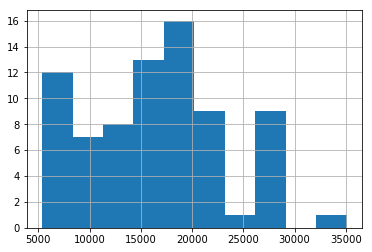

In [21]:
%matplotlib inline
sites['policy_text'].apply(len).hist()

In [24]:
sites[sites['policy_text'].apply(len) < 7500]

,Policy UID,Site UID,Site URL,Site Human-Readable Name,Site Check Date,In 115 Set?,Comments,Sector,Policy URL,Policy collection date,Policy last updated date,policy_text
39,641,1043,cbsnews.com,CBS News,2015-02-14,False,"Alexa Rank: 604 (Global), 157 (US)",Arts,legalterms.cbsinteractive.com/privacy,2015-07-02,2015-05-28,CBS Interactive Privacy Policy Highlights <br>...
40,641,1044,cnet.com,CNET,2015-02-14,False,"Alexa Rank: 146 (Global), 76 (US)",Computers,legalterms.cbsinteractive.com/privacy,2015-07-02,2015-05-28,CBS Interactive Privacy Policy Highlights <br>...
41,641,1045,tv.com,TV.com,2015-02-14,False,"Alexa Rank: 2072 (Global), 1186 (US)",Arts,legalterms.cbsinteractive.com/privacy,2015-07-02,2015-05-28,CBS Interactive Privacy Policy Highlights <br>...
42,641,1046,chowhound.com,Chowhound,2015-02-14,False,"Alexa Rank: 3571 (Global), 1005 (US)",Regional,legalterms.cbsinteractive.com/privacy,2015-07-02,2015-05-28,CBS Interactive Privacy Policy Highlights <br>...
43,641,1047,metacritic.com,Metacritic,2015-02-14,False,"Alexa Rank: 1629 (Global), 1029 (US)",Arts,legalterms.cbsinteractive.com/privacy,2015-07-02,2015-05-28,CBS Interactive Privacy Policy Highlights <br>...
44,641,1048,gamespot.com,GameSpot,2015-02-14,False,"Alexa Rank: 782 (Global), 451 (US)",Kids and Teens,legalterms.cbsinteractive.com/privacy,2015-07-02,2015-05-28,CBS Interactive Privacy Policy Highlights <br>...
45,641,1049,startrek.com,Star Trek,2015-02-14,False,"Alexa Rank: 36263 (Global), 10021 (US)",Arts,legalterms.cbsinteractive.com/privacy,2015-07-02,2015-05-28,CBS Interactive Privacy Policy Highlights <br>...
46,641,1050,gamefaqs.com,GameFAQs,2015-02-14,False,"Alexa Rank: 513 (Global), 283 (US)",Kids and Teens,legalterms.cbsinteractive.com/privacy,2015-07-02,2015-05-28,CBS Interactive Privacy Policy Highlights <br>...
53,641,1041,tvguide.com,TV Guide,2015-02-14,False,"Alexa Rank: 1137 (Global), 316 (US)",Arts,legalterms.cbsinteractive.com/privacy,2015-07-02,2015-05-28,CBS Interactive Privacy Policy Highlights <br>...
54,641,1042,cbs.com,CBS,2015-02-14,False,"Alexa Rank: 879 (Global), 206 (US)",Arts,legalterms.cbsinteractive.com/privacy,2015-07-02,2015-05-28,CBS Interactive Privacy Policy Highlights <br>...


In [9]:
durango_city = ["""
PRIVACY POLICY 

Our privacy policy is simple: We do not collect personal information about you when you visit our website unless you choose to provide that information to us. For example, personal information is gathered when:
 
    • completing a voluntary online form, 
    • sending us an email, 
    • registering for a subscription, or 
    • performing a service transaction using an assigned user ID and password. 

If you submit your resume through our website, we use your personal information only in considering your application for employment. 

We do not collect or use information for commercial marketing. 

About Privacy 
The City considers any information received and available through our website as if it were supplied in writing or through an in-person visit to our offices, and may constitute a public record subject to disclosure under the Public Records Act, Colorado Revised Statutes §24-72-101 et seq., or retention as established by the City of Durango’s Retention Schedule. 

The term "public record" includes any information relating to the conduct of public business prepared, owned, used, or retained by the City of Durango regardless of physical form or characteristics. 

We protect against disclosure of all information declared by law to be confidential. This includes: 

    • Personal medical records 
    • Criminal history records 
    • Gross revenue data submitted by our sales tax licensees 
    • Communications between citizens and law offices 

E-mail 
E-mail messages sent to any City of Durango address will be treated the same as any other written communication, and may be subject to public review. 

E-mail addresses obtained as a result of a request to a City website shall not be sold or distributed to private companies. 

LINKING POLICY 

Links provide a means to expand the City of Durango web site into a more comprehensive and integrated service-oriented site. Linking allows for the decentralized management of related information. Links may be implemented to connect site visitors to information that has a relevant relationship to the City, its services, or a community interest. City web site links shall not be used to promote or endorse any commercial endeavor unless specifically approved by the City Manager’s office. To ensure a clear sense of site ownership, a notification shall be displayed when a visitor leaves the City’s site. Link guidelines include, but are not limited to: 

The linked web site must contribute to the quality of life and further the positive image of the City of Durango.
The web site sponsor must be a locally recognized group or organization that promotes public health, public safety, public welfare, civic, cultural, or charitable ideals and activities.
Links are permitted to United States or State of Colorado governmental agency web sites, as well as other web sites maintained by or on behalf of national, state, regional or local governmental or public educational agencies.
If a web site or the web site's sponsor is substantially engaged in commercial, political, religious, or unlawful activities, the City of Durango will not permit links to such web site.
Exceptions to Guideline #4 may be made if and when the City of Durango enters into a public/private partnership agreement with private entities to host, market, conduct, and/or manage major regional, statewide, or national events within the City of Durango.
Exceptions to Guideline #4 may also be made to provide a public service to the community with regard to emergency information, to provide links to public and private utility service companies, and provide links to web sites that contain pertinent life-sustaining, public safety, and public health information.
The City of Durango may refuse to publish links to any web site at the sole discretion of the City Manager or his designee.

Prohibitions: 
In order to maintain a high standard, the following are prohibited. 

Use of the system for commercial or personal gain.
Attempts to use, reproduce or distribute material in violation of copyright law or applicable provisions of use or license agreements.
Attempts to degrade, disrupt or vandalize equipment.
Attempts to gain unauthorized access to restricted information, networks or other user accounts or files.
Publishing libelous views or opinions.
Display of pornographic or sexually explicit material, or linking to any such material.
Posting of material that discriminates or encourages discrimination based on race, ethnicity, gender, or sexual orientation.

PHOTOGRAPH USE 
Professional photographs displayed on the Durangogov.org website are copyrighted by the photographer. Photos may not be sold or used in any way other than as displayed on Durangogov.org. 

GIS MAPPING 
Maps and information provided by the City of Durango Geographic Information Systems (GIS) Division is provided as a public service for non-commercial use. All information is provided “As-Is” without warranty of any kind. 

Data is updated regularly in an attempt to provide the most accurate information possible. Information is derived from several sources and due to reasons outside of our control, may or may not be complete or current. Such information is intended for reference only, and it is the responsibility of the user to confirm any discrepancies in the data. Neither the City of Durango nor its information provider warrants the accuracy of the information, data or maps. 

By accessing and using this website for GIS information, data or maps your affirm your acceptance of the above terms and conditions. 
"""]

In [10]:
result_durango_city = model.predict(durango_city)
result_durango_city

array([1])

In [11]:
resume = ["""
Peter May-Ostendorp
Durango, Colorado \\ 970.426.8827 \\ peter.mayostendorp@gmail.com
linkedin.com/in/peter-may-ostendorp \\ github.com/pmayostendorp 
Skills
Programming		Data Science Frameworks		Leadership and Communication
Proficient: R, Python, MATLAB, MySQL/postgreSQL.
Familiarity: Java, AWS, Google Cloud.		Modeling: pandas, numpy, scipy, sklearn, nltk, scrapy, matplotlib, seaborn, plotly, tidyverse		Team and project management.
Communication and visualization of complex technical concepts for non-technical audiences.
Experience
Fellow, Insight Data Science	September 2017 – present
Created BeforeIAccept, a novel web application to digest and summarize web privacy policies and provide transparency to busy users who lack the time or legal expertise to interpret such documents.
[More details, I promise, when I can speak to actual implementation and results!]
Principal and Founder, Xergy Consulting, Durango, CO	March 2012 – present
Assembled and grew team of energy experts to provide environmental NGOs, government agencies, electric utilities, and clean tech companies with energy modeling, research, and data science services. Clients include Pacific Gas and Electric Company, Aclara, and Tendril Networks.
Cultivated team competencies in R data science frameworks, cloud-based data warehousing (Google Cloud Platform SQL), and web scraping (Scrapy) to accelerate delivery of analysis and differentiate against competitors.
Provided Pacific Gas and Electric company with foundational technical and economic analysis to support the development of the nation’s first mandatory energy efficiency standard for computers, estimated to save Californians $370M per year.
Advisor, Yonomi, Boulder, CO	October 2013 – present
Provided technical and strategic guidance to Yonomi, an IoT app and platform for orchestrating routines between smart devices.
Co-founder and Technical Advisor, QCoefficient, Chicago, IL	January 2013 – June 2014
Co-led the engineering and development of a patent-pending commercial building model-predictive control SaaS platform, focusing on MATLAB- and MySQL-based backend.
Developed distributed particle swarm optimizer, speeding optimization execution 3- to 5-fold.
Doctoral Candidate, University of Colorado, Boulder, CO	November 2008 – March 2012
Investigated model predictive strategies for mixed mode and naturally ventilated buildings.
Created related ML-based control rule extraction technique for generating supervisory, near-optimal control rules, resulting in 5 publications receiving over 150 citations to date.
Research Consultant, Tendril Networks, Boulder, CO	June 2010 – December 2010
Identified and pursued public RD&D funding opportunities to expand Tendril research capabilities.
Assisted in technical due diligence for acquisition of Grounded Power, Inc.
Manager of Research and Policy, Ecos, Durango, CO	June 2004 – July 2008
Established and managed electronics energy research lab and developed datasets and analysis driving efficiency policy on consumer goods including incandescent light bulbs, televisions, and AC-DC power supplies. 
Education
Ph.D. Civil Engineering, University of Colorado, Boulder, CO	April 2012
B.E. Mechanical Engineering, Dartmouth College, Hanover, NH	June 2004
B.A. Engineering Sciences, Dartmouth College, Hanover, NH	June 2003
Awards and Honors
Fellowships: College of Engineering Research Fellow, Dean’s Outstanding Merit Fellow, ASHRAE Grant-in-Aid Fellow
Honors: National Science Foundation Graduate Research Program Honorable Mention
"""]

In [12]:
result_resume = model.predict(resume)
result_resume

array([0])

In [13]:
fb_nosecurity = ["""
Workplace Privacy Policy
Effective Date: September 30, 2016

Workplace allows users to more effectively collaborate and share information at work. This Privacy Policy describes how and when your information is collected, used, and shared by Facebook when you, your colleagues, or other users use the Workplace platform (which includes the Workplace websites, apps and related online services that link to this Privacy Policy, which we call the “Services”).

The Services are intended for use by organizations and in accordance with their instructions. If you are using the Services in a workplace or on a device or account issued to you by your employer or another organization (your “Organization”), that Organization likely has its own policies regarding storage, access, modification, deletion, and retention of information you submit or provide through the Services.

This means that your Organization has the right to (i) control and administer your Workplace account (“Your Account”) and (ii) access and process any data you submit or provide through the Services, including, for example, your files and communications. Please contact your Organization with any privacy inquiries regarding policies, including any enterprise agreements with Facebook, it has in place regarding your use of the Services.

As a reminder, Workplace is a different service from other Facebook services you may use. Those other Facebook services are governed by their own terms, whereas this Privacy Policy and the Workplace Acceptable Use Policy applies to your use of the Services.

I. COLLECTION OF INFORMATION
Facebook may collect the following kinds of information on behalf of your Organization when you, your colleagues, or other users access the Services:

Customer Data. Through use of the Services, you, your colleagues, your Organization, and other users, will directly provide or submit information to Facebook ("Customer Data"). Customer Data includes, for example:
Contact information, such as full name and email address;
Demographic information;
Username and password;
Work title, department information, and other information related to your work or Organization;
All content that you create, share or post in audio, video, text, images, and other media or software files that you provide on or through the Services, or that are provided on your behalf, including information in or about the content you provide, such as the location of a photo or the date a file was created;
Information other people provide about you when using the Services, including when they send a message to you or upload information about you;
All communications with other users of the Services;
User communications, feedback, suggestions, and ideas sent to us;
Billing information; and
Information you provide us when you or your Organization contact or engage us for support regarding the Services.

Log and Cookie Data. We automatically collect certain information on your Organization’s behalf through the Services, such as your Internet protocol (IP) address and other browser or device identifiers, browser type, operating system, crash data, Internet service provider, pages that you visit before and after using the Services, the date and time of your visit, information about your activities (such as the links you click and pages you view) within the Services, and other standard server-log information (“Log and Cookie Data”).

In order to provide the Services on behalf of your Organization, we may use cookies, pixel tags, local storage objects, and similar technologies to automatically collect this information. You can find out more about our use of cookies and related technologies, including the purposes for which we use them, by reading our Workplace Cookies Statement. By using the Services, you consent to our use of cookies and similar technologies as described in our Workplace Cookies Statement.

Your browser or device may offer settings related to these technologies. For more information about whether these settings are available, what they do, and how they work, visit your browser or device's help material. We may not recognize or respond to browser or device signals around tracking, and some settings may interfere with your use of features we offer. Additionally, the settings offered by a browser or device often apply only to that particular browser or device.

Information we collect from Facebook and Our Family of Companies. From time to time, we may receive information on your Organization’s behalf, about you from companies that are owned or operated by Facebook, in accordance with their terms and policies. Learn more about these companies and their privacy policies.

We also receive information from our third party partners on your Organization’s behalf for some of the purposes described in Section II below.

II. USE OF INFORMATION
Facebook will use information we collect to provide, develop, and improve the Services on your Organization’s behalf and in accordance with any other instructions from your Organization. Examples of such use include:
Communicate with users and administrators regarding their use of the Services;
Personalize your and your Organization’s experiences as part of our provision of the Services;
Develop new tools, products, or services for your Organization;
Associate activity on our Services across different devices operated by the same individual to improve the Service which we provide to your Organization;
Associate activity on our Services across different devices operated by the same individual; and
Conduct data and system analytics, including research to improve the Services. In these circumstances Facebook shall to the extent possible use de-identified or aggregated data.

We may also use the information we collect in order to operate, maintain, and improve the systems and infrastructure that provide the Services. You and your Organization authorize us to do so and acknowledge that this may also result in improvements to the Facebook Services, since centralized systems and infrastructure support the Services and Facebook Services. For example, we may use crash logs from your use of the Services to identify and fix bugs that may also be present in the Facebook Services.

III. DISCLOSURE OF INFORMATION
We may, as directed or approved by your Organization, disclose the information that we collect in the following circumstances:
To your Organization, network administrators, and other users authorized by your Organization to access the requested information;
To third-party service providers that are in the United States and in other countries where such service providers assist in providing the Services or part of the Services;
To the family of companies that are part of Facebook;
To third-party apps, websites, or other services that you can connect to through the Services;
In connection with a substantial corporate transaction, such as the sale of our Services, a merger, consolidation, asset sale, or in the unlikely event of bankruptcy or insolvency;
To protect the safety of any person; to address fraud, security or technical issues; or to protect Workplace’s rights or property; and
As otherwise directed or authorized by your Organization.

Legal Requests. If we receive a subpoena, warrant, discovery order or other request or order from a law enforcement agency, court, other governmental entity, or litigant that seeks data relating to the Services (collectively a “Legal Request”), we will make reasonable attempts to direct the requesting party to seek the data directly from your Organization. If we ask the requesting party to direct the request to the Organization, we will provide your Organization’s contact information to the requesting party. If legally compelled to produce information and unless legally prohibited, we will use reasonable efforts to notify your Organization so they can notify you pursuant to your Organization’s policies and as permitted by law. We will direct any requests for information under data protection laws to your Organization, unless prohibited by law.

Aggregate or de-identified data. We may also disclose information that has been aggregated or that otherwise does not personally identify you to third parties and affiliates who may use it for analytics, trends and analysis to improve and provide our products and services and the products and services provided by the Facebook Family of Companies described here.

V. ACCESSING AND MODIFYING YOUR INFORMATION
You and your Organization may access, correct, or delete information you have uploaded to the Services by using the tools within the Services (for example, editing your profile information or via Activity Log) provided by us on behalf of your Organization. If not enabled by the tools provided on the Services, you should contact your Organization directly to access or modify your information.

Changes you make to your information on the Services take immediate effect on your specific network, but data will be retained by Facebook in backup copies for a commercially reasonable amount of time and as directed by your Organization.

VI. DATA LOCATION AND PRIVACY SHIELD
In providing the Services to you and in using the service providers referred to in this Privacy Policy, you understand that information may be stored or processed in different locations around the world by us on your Organization’s behalf. For example, information collected within the European Economic Area (“EEA”) may, for example, be transferred to countries outside of the EEA for the purposes described in this policy.

For users outside the US and Canada, you acknowledge that using the Services may result in Facebook, Inc. receiving personal information from you (it will do so solely acting on behalf of Facebook Ireland Limited (Facebook Ireland)) in respect of which it has made commitments under the EU-US Privacy Shield (“Privacy Shield”). Facebook Inc. complies with the Privacy Shield Principles regarding any personal information received in reliance on Privacy Shield, as described in our Privacy Shield certification. Further information on Facebook Inc.’s participation in Privacy Shield, including contact information, is set out below and also available here.

VII. THIRD-PARTY LINKS AND CONTENT
Some of the Services may contain links to content maintained by third parties that we do not control. We are not responsible for the privacy practices of these third parties, and we recommend that you visit the privacy policies of each website that you visit.

VIII. ACCOUNT CLOSURE
If you would like to stop using the Services, you should contact your Organization. Similarly, if you stop working for or with the Organization, the Organization may suspend Your Account and/or delete any information associated with Your Account.

It typically takes about 90 days to delete an account on behalf of your Organization after account closure, but some information may remain in backup copies for a reasonable period of time as directed by your Organization. Please note, content you create and share on the Services is owned by your Organization and may remain on the Services and be accessible even if your Organization deactivates or terminates Your Account. In this way, content you provide on the Services is similar to other types of content (such as presentations or memos) that you may generate in the course of your work.

IX. CHANGES TO THE PRIVACY POLICY
We may update this Privacy Policy from time to time. When we update the Privacy Policy, we will revise the “Effective Date” date above and post the new Privacy Policy.

X. CONTACT US
If you have any questions about this Privacy Policy or our practices, please first contact us via your Organization’s account manager because, as stated above, your use of our Services is likely subject to your Organization’s own policies.
If you have further questions about this Privacy Policy, or wish to learn more about our privacy practices, including transfers under the Privacy Shield, please contact your Organization or us by email at privacyshield@support.facebook.com, or by mail at:
Facebook, Inc.
1601 Willow Road
Menlo Park, CA 94025 (if you live in the US or Canada)
OR
Facebook Ireland Ltd.
4 Grand Canal Square
Grand Canal Harbour
Dublin 2 Ireland (if you live anywhere else).
"""]

In [15]:
result_fb_nosecurity = model.predict(fb_nosecurity)
result_fb_nosecurity

array([1])